In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import model_from_json, Sequential
from keras.layers import LSTM, Dense, Dropout

In [2]:
train_df = pd.read_csv("../Datasets/train.csv")
test_df = pd.read_csv("../Datasets/test.csv")

train_df.drop("Unnamed: 0", axis=1,inplace=True)
test_df.drop("Unnamed: 0", axis=1, inplace=True)

In [3]:
train_df.index = train_df["Date and time"]
test_df.index = test_df["Date and time"]

train_df.drop('Date and time', axis=1, inplace=True)
test_df.drop('Date and time', axis=1, inplace=True)

In [4]:
train_df

,Gear oil temperature (°C),Front bearing temperature (°C),Rear bearing temperature (°C),Gear oil inlet temperature (°C),Generator bearing front temperature (°C),Generator bearing rear temperature (°C),Rotor bearing temp (°C),Stator temperature 1 (°C)
Date and time,,,,,,,,
01-01-2020 00:00,56.972500,65.880001,65.382499,55.497500,38.277500,36.752500,27.182501,58.377500
01-01-2020 00:10,56.695001,64.602500,64.712498,55.230000,39.145000,37.037499,27.190001,58.952500
01-01-2020 00:20,56.640000,64.740000,64.917499,55.107500,39.897500,37.347500,27.197501,59.660000
01-01-2020 00:30,56.432500,63.137500,63.990000,55.135000,40.625000,37.752500,27.140001,60.550000
01-01-2020 00:40,56.169998,62.037500,63.525000,54.915000,41.252500,38.362500,27.100000,61.694999
...,...,...,...,...,...,...,...,...
31-12-2020 23:10,50.830000,57.390000,59.570001,50.375000,36.480000,36.380000,23.212501,57.970000
31-12-2020 23:20,50.792500,56.595000,58.920000,50.307499,37.410000,36.672500,23.297499,58.472500
31-12-2020 23:30,50.742500,57.007500,59.552501,50.109999,38.177500,37.022499,23.299999,59.207500


In [5]:
test_df

,Gear oil temperature (°C),Front bearing temperature (°C),Rear bearing temperature (°C),Gear oil inlet temperature (°C),Generator bearing front temperature (°C),Generator bearing rear temperature (°C),Rotor bearing temp (°C),Stator temperature 1 (°C)
Date and time,,,,,,,,
01-01-2021 00:00,17.442500,17.300000,15.615000,12.577500,16.700001,10.675000,10.700000,17.779999
01-01-2021 00:10,18.220000,17.172501,15.445000,13.687500,16.535000,10.600000,10.687500,17.600000
01-01-2021 00:20,18.230000,17.102500,15.490000,14.760000,16.427500,10.430000,10.600000,17.532500
01-01-2021 00:30,17.485000,17.035000,15.340000,12.520000,16.320000,10.327500,10.510000,17.495000
01-01-2021 00:40,17.785000,16.885000,15.220000,13.002500,16.200001,10.285000,10.380000,17.400000
...,...,...,...,...,...,...,...,...
16-06-2021 07:40,57.497499,65.087501,66.695001,56.230000,47.552500,47.002500,31.000000,64.980001
16-06-2021 07:50,57.591667,64.636111,66.141666,56.108333,44.544444,45.872222,31.000000,63.244444
16-06-2021 08:00,57.375001,63.017500,65.092500,55.575000,41.740000,44.455000,31.062500,60.907500


In [6]:
def data_into_timeseries(df):
    for i in df.columns:
        data = pd.DataFrame(df[i])
        data.index = df.index
        data.rename(columns={i:'y'}, inplace=True)
        data['x1']= data['y'].shift()
        data['x2']= data['y'].shift(2)
        data['x3']= data['y'].shift(3)
        data['x4']= data['y'].shift(4)
        data['x5']= data['y'].shift(5)
        data['x6']= data['y'].shift(6)

        data = data.iloc[6:]
        
        data.to_csv("../Datasets/Timeseries Data/" + i + ".csv")
        
        print("Saved", i + ".csv")

In [7]:
data_into_timeseries(train_df)

Saved Gear oil temperature (°C).csv
Saved Front bearing temperature (°C).csv
Saved Rear bearing temperature (°C).csv
Saved Gear oil inlet temperature (°C).csv
Saved Generator bearing front temperature (°C).csv
Saved Generator bearing rear temperature (°C).csv
Saved Rotor bearing temp (°C).csv
Saved Stator temperature 1 (°C).csv


In [8]:
def forcasting_model(path):
    # LSTM Model
    model = Sequential()
    model.add(LSTM(64, return_sequences=True, input_shape=(1, 6)))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1, activation='relu'))
    model.compile(optimizer='adam', loss='mse')
    model.summary()

    # Saving the LSTM Model
    model_json = model.to_json()
    with open("../Model Files/LSTM Model/model.json", "w") as json_file:
        json_file.write(model_json)

    # Training LSTM Model on every Feature
    for i in os.listdir(path):
        data = pd.read_csv(path + i)
        data.drop("Date and time", axis=1, inplace=True)

        # Reshaping the data
        x_train = data.drop(['y'], axis=1)
        x_train = x_train.values.reshape((x_train.values.shape[0], 1, x_train.values.shape[1]))
        y_train = data['y'].values

        # Training on 100 epochs
        print("\nTraining the LSTM Mode for", i)
        history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_split=0.25, shuffle=True).history

        # Plotting the Model Loss per epoch
        fig, ax = plt.subplots(figsize=(14, 6), dpi=80,)
        ax.plot(history['loss'], 'b', label='Train', linewidth=2)
        ax.plot(history['val_loss'], 'r', label='Validation', linewidth=2)
        ax.set_title(f'Model loss for {i}', fontsize=16)
        ax.set_ylabel('Loss (mae)')
        ax.set_xlabel('Epoch')
        ax.legend(loc='upper right')
        plt.show()

        # Saving the Weights of each trained Model
        model.save_weights("../Model Files/LSTM Model/" + i + ".h5")
        print("Saved the Model Weights for", i, "\n")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 64)             18176     
                                                                 
 lstm_1 (LSTM)               (None, 50)                23000     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 41,227
Trainable params: 41,227
Non-trainable params: 0
_________________________________________________________________

Training the LSTM Mode for Front bearing temperature (°C).csv
Epoch 1/100
3656/3656 [==============================] - 15s 3ms/step - loss: 114.1819 - val_loss: 3.7265
Epoch 2/100
3656/3656 [==============================] - 11s 3ms/step - loss: 3.1520 - val_loss: 6.3875
Epoch 3/100
3656/3656 [====================

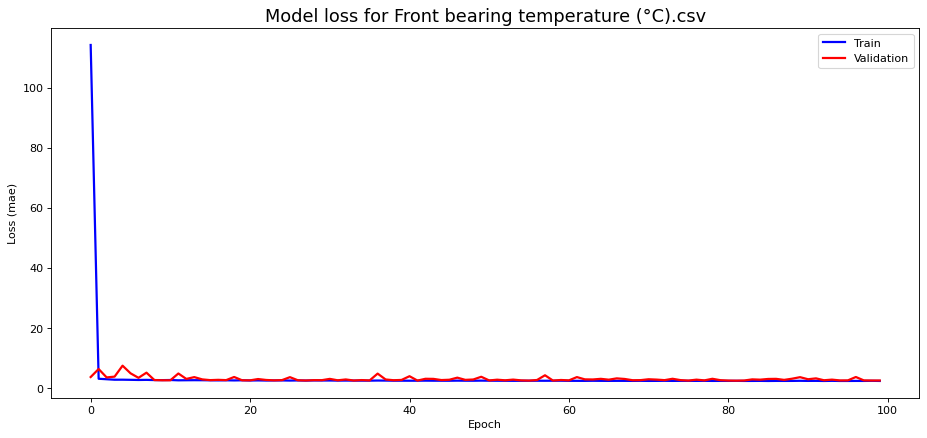

Saved the Model Weights for Front bearing temperature (°C).csv 


Training the LSTM Mode for Gear oil inlet temperature (°C).csv
Epoch 1/100
3656/3656 [==============================] - 9s 3ms/step - loss: 14.7115 - val_loss: 13.4038
Epoch 2/100
3656/3656 [==============================] - 9s 3ms/step - loss: 14.4744 - val_loss: 13.2336
Epoch 3/100
3656/3656 [==============================] - 9s 2ms/step - loss: 14.3547 - val_loss: 15.4369
Epoch 4/100
3656/3656 [==============================] - 9s 3ms/step - loss: 14.3099 - val_loss: 13.3087
Epoch 5/100
3656/3656 [==============================] - 9s 2ms/step - loss: 14.2589 - val_loss: 12.9976
Epoch 6/100
3656/3656 [==============================] - 9s 2ms/step - loss: 14.1494 - val_loss: 13.1980
Epoch 7/100
3656/3656 [==============================] - 9s 3ms/step - loss: 14.1367 - val_loss: 13.2877
Epoch 8/100
3656/3656 [==============================] - 9s 3ms/step - loss: 14.1414 - val_loss: 12.9396
Epoch 9/100
3656/3656 [========

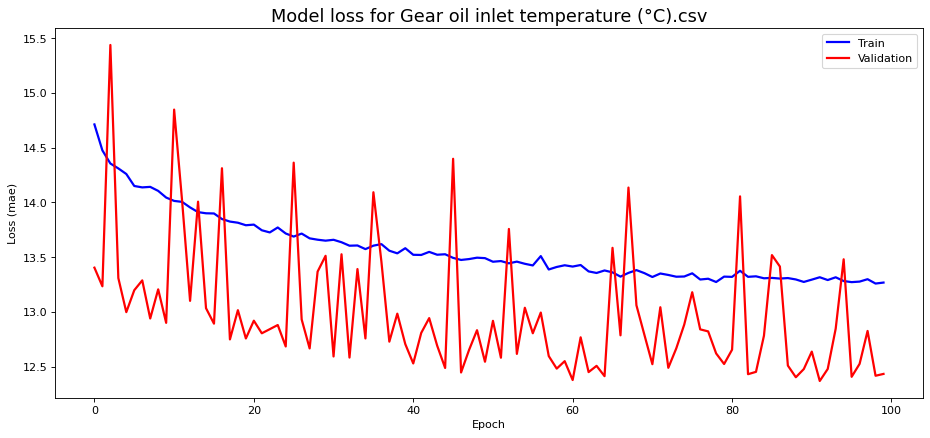

Saved the Model Weights for Gear oil inlet temperature (°C).csv 


Training the LSTM Mode for Gear oil temperature (°C).csv
Epoch 1/100
3656/3656 [==============================] - 9s 3ms/step - loss: 1.0794 - val_loss: 0.9220
Epoch 2/100
3656/3656 [==============================] - 9s 2ms/step - loss: 1.0492 - val_loss: 0.8963
Epoch 3/100
3656/3656 [==============================] - 9s 2ms/step - loss: 1.0394 - val_loss: 0.8944
Epoch 4/100
3656/3656 [==============================] - 9s 2ms/step - loss: 1.0387 - val_loss: 1.0190
Epoch 5/100
3656/3656 [==============================] - 9s 2ms/step - loss: 1.0335 - val_loss: 0.9173
Epoch 6/100
3656/3656 [==============================] - 9s 2ms/step - loss: 1.0292 - val_loss: 0.9509
Epoch 7/100
3656/3656 [==============================] - 9s 2ms/step - loss: 1.0343 - val_loss: 0.9210
Epoch 8/100
3656/3656 [==============================] - 9s 2ms/step - loss: 1.0285 - val_loss: 0.8758
Epoch 9/100
3656/3656 [=============================

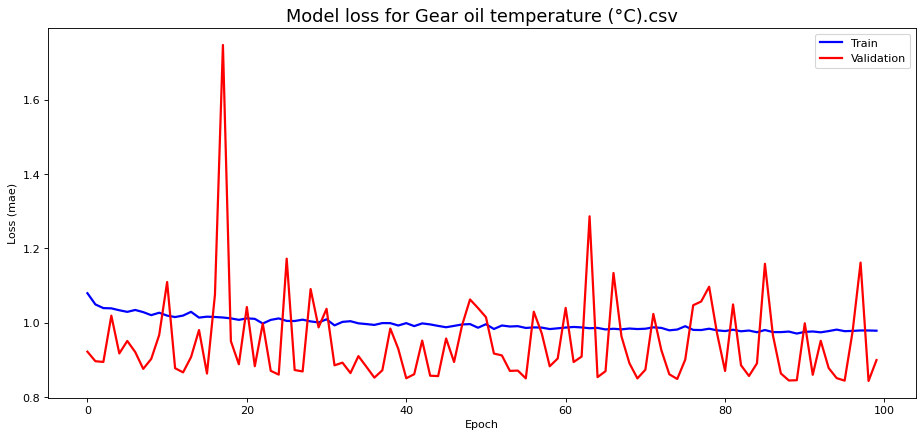

Saved the Model Weights for Gear oil temperature (°C).csv 


Training the LSTM Mode for Generator bearing front temperature (°C).csv
Epoch 1/100
3656/3656 [==============================] - 9s 3ms/step - loss: 0.7143 - val_loss: 0.8545
Epoch 2/100
3656/3656 [==============================] - 9s 3ms/step - loss: 0.6751 - val_loss: 0.7333
Epoch 3/100
3656/3656 [==============================] - 9s 3ms/step - loss: 0.6757 - val_loss: 0.8441
Epoch 4/100
3656/3656 [==============================] - 9s 3ms/step - loss: 0.6620 - val_loss: 0.6896
Epoch 5/100
3656/3656 [==============================] - 9s 3ms/step - loss: 0.6553 - val_loss: 0.6932
Epoch 6/100
3656/3656 [==============================] - 9s 3ms/step - loss: 0.6572 - val_loss: 0.6660
Epoch 7/100
3656/3656 [==============================] - 9s 3ms/step - loss: 0.6478 - val_loss: 0.6844
Epoch 8/100
3656/3656 [==============================] - 9s 3ms/step - loss: 0.6447 - val_loss: 0.8366
Epoch 9/100
3656/3656 [====================

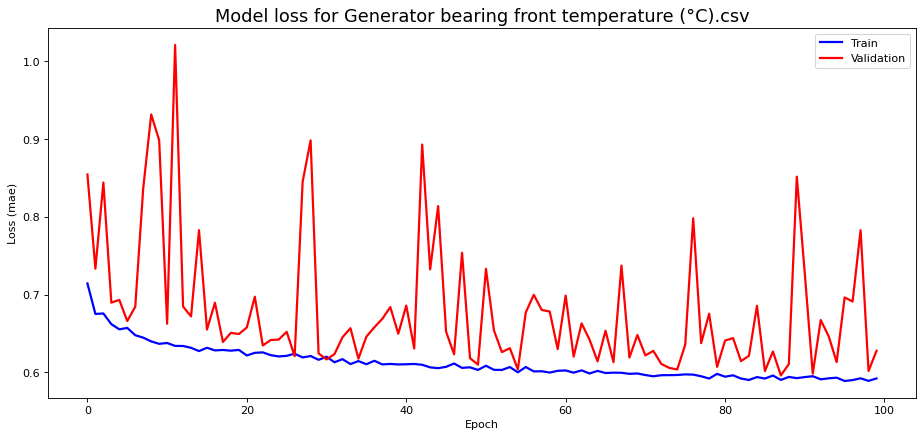

Saved the Model Weights for Generator bearing front temperature (°C).csv 


Training the LSTM Mode for Generator bearing rear temperature (°C).csv
Epoch 1/100
3656/3656 [==============================] - 9s 3ms/step - loss: 0.2231 - val_loss: 0.1994
Epoch 2/100
3656/3656 [==============================] - 9s 2ms/step - loss: 0.2040 - val_loss: 0.1967
Epoch 3/100
3656/3656 [==============================] - 9s 2ms/step - loss: 0.2001 - val_loss: 0.3114
Epoch 4/100
3656/3656 [==============================] - 10s 3ms/step - loss: 0.1996 - val_loss: 0.1952
Epoch 5/100
3656/3656 [==============================] - 10s 3ms/step - loss: 0.1966 - val_loss: 0.2959
Epoch 6/100
3656/3656 [==============================] - 9s 3ms/step - loss: 0.1987 - val_loss: 0.2051
Epoch 7/100
3656/3656 [==============================] - 10s 3ms/step - loss: 0.1969 - val_loss: 0.2312
Epoch 8/100
3656/3656 [==============================] - 10s 3ms/step - loss: 0.1982 - val_loss: 0.1911
Epoch 9/100
3656/3656 [==

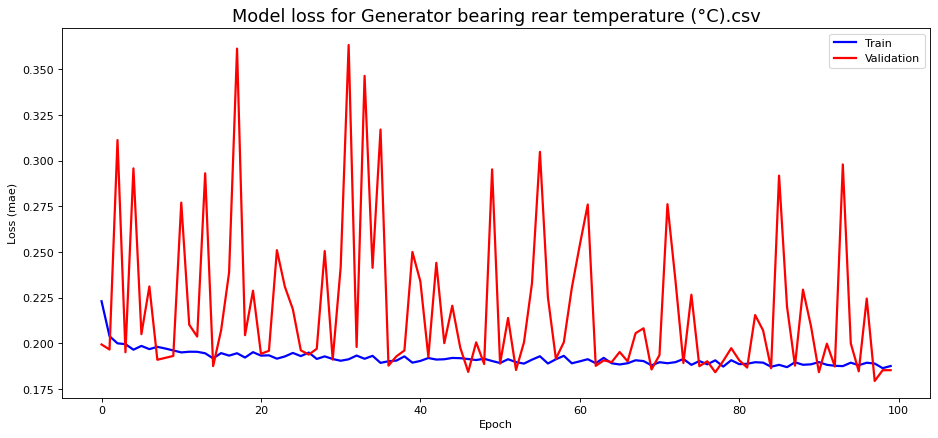

Saved the Model Weights for Generator bearing rear temperature (°C).csv 


Training the LSTM Mode for Rear bearing temperature (°C).csv
Epoch 1/100
3656/3656 [==============================] - 10s 3ms/step - loss: 2.8122 - val_loss: 2.7132
Epoch 2/100
3656/3656 [==============================] - 12s 3ms/step - loss: 2.6604 - val_loss: 3.4269
Epoch 3/100
3656/3656 [==============================] - 11s 3ms/step - loss: 2.6224 - val_loss: 2.7910
Epoch 4/100
3656/3656 [==============================] - 10s 3ms/step - loss: 2.6114 - val_loss: 2.5446
Epoch 5/100
3656/3656 [==============================] - 10s 3ms/step - loss: 2.5921 - val_loss: 2.6624
Epoch 6/100
3656/3656 [==============================] - 10s 3ms/step - loss: 2.5875 - val_loss: 2.7745
Epoch 7/100
3656/3656 [==============================] - 10s 3ms/step - loss: 2.5827 - val_loss: 2.6264
Epoch 8/100
3656/3656 [==============================] - 11s 3ms/step - loss: 2.5708 - val_loss: 2.5470
Epoch 9/100
3656/3656 [=========

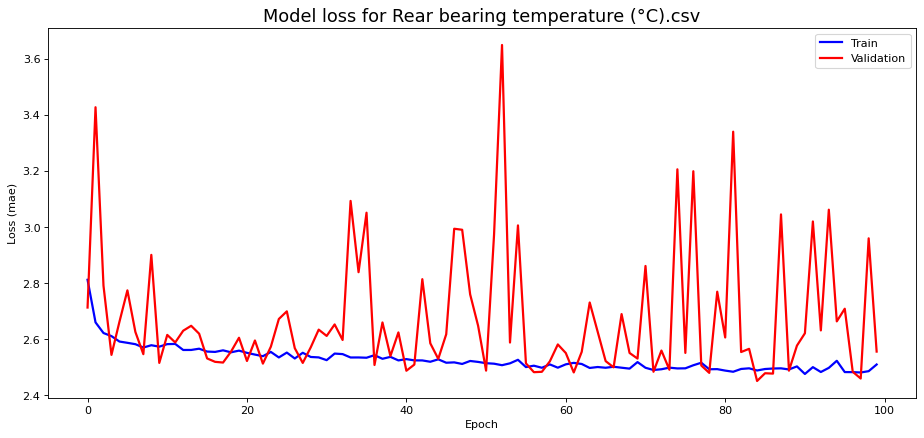

Saved the Model Weights for Rear bearing temperature (°C).csv 


Training the LSTM Mode for Rotor bearing temp (°C).csv
Epoch 1/100
3656/3656 [==============================] - 9s 3ms/step - loss: 0.0850 - val_loss: 0.0174
Epoch 2/100
3656/3656 [==============================] - 9s 3ms/step - loss: 0.0306 - val_loss: 0.0151
Epoch 3/100
3656/3656 [==============================] - 9s 3ms/step - loss: 0.0146 - val_loss: 0.0138
Epoch 4/100
3656/3656 [==============================] - 9s 3ms/step - loss: 0.0135 - val_loss: 0.0111
Epoch 5/100
3656/3656 [==============================] - 9s 3ms/step - loss: 0.0126 - val_loss: 0.0088
Epoch 6/100
3656/3656 [==============================] - 9s 3ms/step - loss: 0.0131 - val_loss: 0.0139
Epoch 7/100
3656/3656 [==============================] - 9s 3ms/step - loss: 0.0125 - val_loss: 0.0121
Epoch 8/100
3656/3656 [==============================] - 9s 3ms/step - loss: 0.0127 - val_loss: 0.0126
Epoch 9/100
3656/3656 [==============================] -

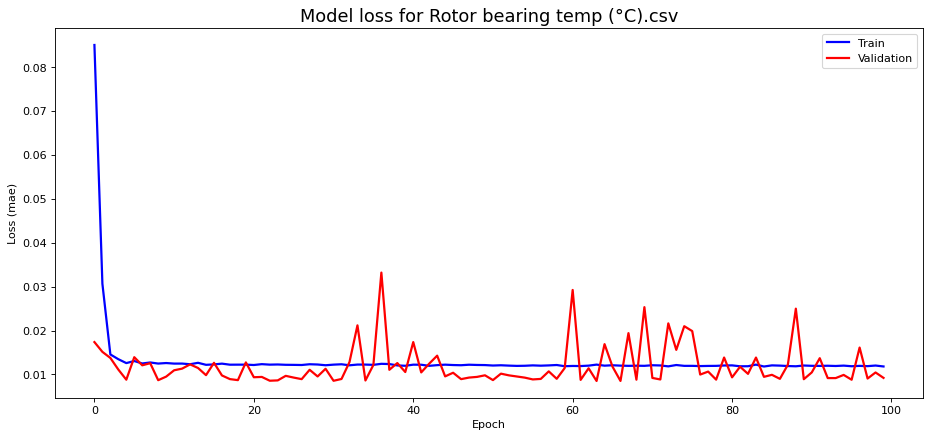

Saved the Model Weights for Rotor bearing temp (°C).csv 


Training the LSTM Mode for Stator temperature 1 (°C).csv
Epoch 1/100
3656/3656 [==============================] - 10s 3ms/step - loss: 2.3413 - val_loss: 1.0979
Epoch 2/100
3656/3656 [==============================] - 9s 3ms/step - loss: 1.2213 - val_loss: 1.1035
Epoch 3/100
3656/3656 [==============================] - 9s 3ms/step - loss: 1.1733 - val_loss: 1.1112
Epoch 4/100
3656/3656 [==============================] - 10s 3ms/step - loss: 1.1705 - val_loss: 1.0023
Epoch 5/100
3656/3656 [==============================] - 9s 3ms/step - loss: 1.1470 - val_loss: 1.1262
Epoch 6/100
3656/3656 [==============================] - 10s 3ms/step - loss: 1.1413 - val_loss: 0.9803
Epoch 7/100
3656/3656 [==============================] - 10s 3ms/step - loss: 1.1324 - val_loss: 0.9487
Epoch 8/100
3656/3656 [==============================] - 10s 3ms/step - loss: 1.1344 - val_loss: 1.0763
Epoch 9/100
3656/3656 [==============================] 

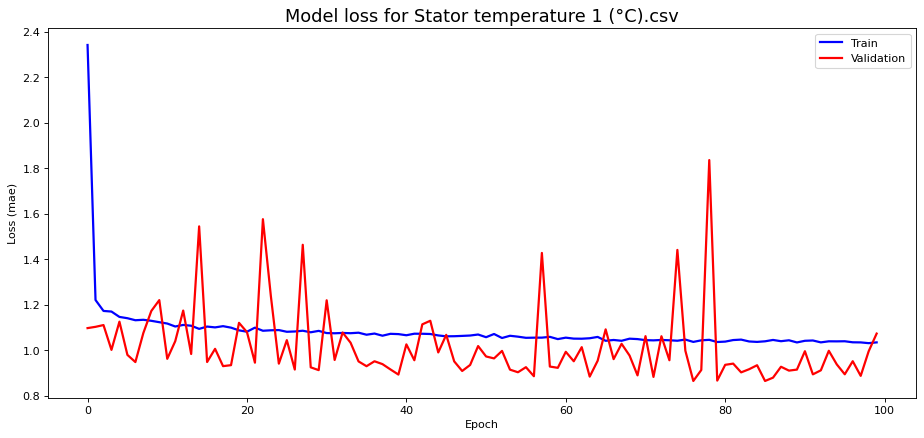

Saved the Model Weights for Stator temperature 1 (°C).csv 



In [9]:
forcasting_model("../Datasets/Timeseries Data/")